## Import

In [27]:
import pandas as pd
from config import BASE_DIR, RESULTS_DIR
import matplotlib.pyplot as plt

## Load

In [17]:
garch_df = pd.read_csv(f'{RESULTS_DIR}/metrics/garch_metrics.csv')
xgb_df = pd.read_csv(f'{RESULTS_DIR}/metrics/xgboost_metrics.csv')

## Merge data and compare

In [23]:
comparison_df = pd.concat([garch_df, xgb_df], ignore_index=True)
comparison_df = comparison_df.rename(columns={'R_squared': 'R²'})
comparison_df.to_csv(RESULTS_DIR / "metrics" / "model_comparison.csv", index=False)
print(f" Model comparison saved to {RESULTS_DIR / 'metrics' / 'model_comparison.csv'}")

 Model comparison saved to C:\Users\hp\Financial-volatility-forecasting\results\metrics\model_comparison.csv


In [24]:
# Note: For R2, we want to see the increase
baseline_rmse = comparison_df.loc[0, 'rmse']
baseline_mae = comparison_df.loc[0, 'mae']
baseline_r2 = comparison_df.loc[0, 'R²']

new_rmse = comparison_df.loc[1, 'rmse']
new_mae = comparison_df.loc[1, 'mae']
new_r2 = comparison_df.loc[1, 'R²']
rmse_imp = (baseline_rmse - new_rmse) / baseline_rmse * 100
mae_imp = (baseline_mae - new_mae) / baseline_mae * 100
r2_imp = (new_r2 - baseline_r2) / baseline_r2 * 100

print(f"Efficiency Gain: XGBoost reduced RMSE by {rmse_imp:.2f}%")
print(f"Accuracy Gain: XGBoost increased R² by {r2_imp:.2f}%")
comparison_df



Efficiency Gain: XGBoost reduced RMSE by 7.14%
Accuracy Gain: XGBoost increased R² by 108.72%


,model,rmse,mae,R²
0,GARCH,0.107840,0.062151,0.112468
1,XGBoost,0.100136,0.056176,0.234745


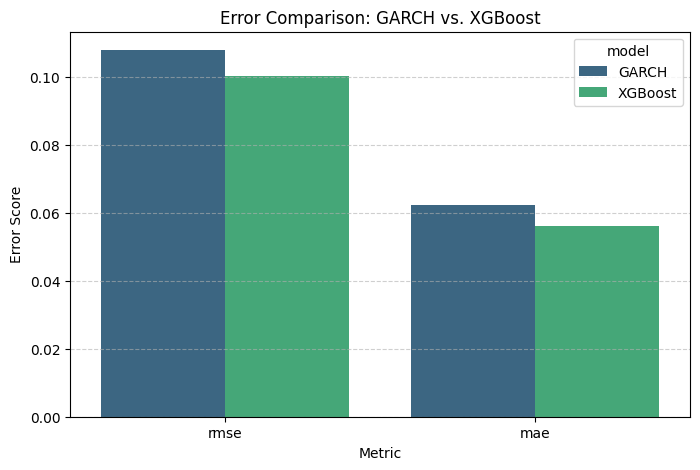

In [31]:
# Melt the dataframe for plotting
plot_data = comparison_df.melt(id_vars='model', value_vars=['rmse', 'mae'], 
                                var_name='Metric', value_name='Score')

import seaborn as sns
plt.figure(figsize=(8, 5))
sns.barplot(data=plot_data, x='Metric', y='Score', hue='model', palette='viridis')

plt.title("Error Comparison: GARCH vs. XGBoost")
plt.ylabel("Error Score")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig(BASE_DIR / "assets" / "error_comparison.png")